In [1]:
# Libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.lines import Line2D
from matplotlib import cm
import matplotlib.ticker as mtick
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib.patches as mpatches

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

## 2021 Ireland official Wild birds avian influenza test results

Avian influenza PCR test results of wild birds sampled in Ireland over the period Jan 2021 to Dec 2021. When possible, further virus typing of H and N antigens in positive samples recorded. Wild bird species, tissue(s) sampled and approximate location of wild bird discovery also recorded.

> https://data.gov.ie/dataset/2021-ireland-official-wild-birds-avian-influenza-test-results

> https://www.gov.ie/en/publication/27c1b-avian-influenza-bird-flu-statistics/

In [2]:
# Loading dataset
bird_flu = pd.read_excel('data/237231_9c2bc8b5-dc06-44b9-a112-759029fd7704.xlsx')

In [3]:
bird_flu.head()

,progId,progType,sampMethod,progInfo_targetGroup,sampEventId,sampArea,sampDate,sampYear,sampMonth,sampDay,...,sampMatCode_source,sampMatCode_part,labId,paramType,paramCode_param,paramCode_antH,paramCode_antN,anMethCode,resId,resQualValue
0,EU_WildBird,Surveillance passive,Individual,Found dead,PV21-000976,Westmeath,2021-01-18,2021,1,18,...,Pigeon,Tissue-Pool,ARVL,Individual,Influenza A virus,NaN,NaN,Real-time RT PCR,40893,No RNA detected
1,EU_WildBird,Surveillance passive,Individual,Found dead,PV21-000977,Westmeath,2021-01-18,2021,1,18,...,Pigeon,Intestine,ARVL,Individual,Influenza A virus,NaN,NaN,Real-time RT PCR,40894,No RNA detected
2,EU_WildBird,Surveillance passive,Individual,Found dead,PV21-000978,Westmeath,2021-01-18,2021,1,18,...,Pigeon,Brain,ARVL,Individual,Influenza A virus,NaN,NaN,Real-time RT PCR,40895,No RNA detected
3,EU_WildBird,Surveillance passive,Individual,Found dead,PV21-001705,Westmeath,2021-01-20,2021,1,20,...,Black-Headed Gull,Intestine,ARVL,Individual,Influenza A virus,NaN,NaN,Real-time RT PCR,40896,No RNA detected
4,EU_WildBird,Surveillance passive,Individual,Found dead,PV21-001706,Westmeath,2021-01-20,2021,1,20,...,Black-Headed Gull,Brain,ARVL,Individual,Influenza A virus,NaN,NaN,Real-time RT PCR,40897,No RNA detected


In [4]:
bird_flu['resQualValue'].value_counts()

No RNA detected    296
Negative           242
Positive           144
Name: resQualValue, dtype: int64

In [27]:
infected_birds = bird_flu[bird_flu['resQualValue'] == 'Positive']
infected_birds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 6 to 681
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   progId                144 non-null    object 
 1   progType              144 non-null    object 
 2   sampMethod            144 non-null    object 
 3   progInfo_targetGroup  144 non-null    object 
 4   sampEventId           144 non-null    object 
 5   sampArea              144 non-null    object 
 6   sampDate              144 non-null    object 
 7   sampYear              144 non-null    int64  
 8   sampMonth             144 non-null    int64  
 9   sampDay               144 non-null    int64  
 10  sampInfo_latitude     144 non-null    float64
 11  sampInfo_longitude    144 non-null    float64
 12  sampMatCode_base      144 non-null    object 
 13  sampMatCode_source    144 non-null    object 
 14  sampMatCode_part      144 non-null    object 
 15  labId                 1

In [28]:
infected_birds.groupby('sampMatCode_source')['sampMatCode_source'].count().sort_values(ascending=False)

sampMatCode_source
Whooper Swan           53
Mute Swan              36
Greylag Goose          25
Knots                   6
Peregrine               6
Herring Gull            4
Brent Goose             3
Crow                    3
Magpie                  3
White-tailed  Eagle     2
Kestrel                 1
Merlin                  1
Water Rail              1
Name: sampMatCode_source, dtype: int64

<AxesSubplot:title={'center':'Number of infected birds by species'}, ylabel='sampMatCode_source'>

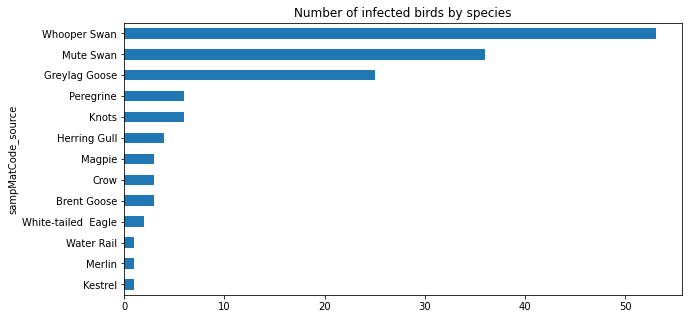

In [31]:
infected_birds.groupby('sampMatCode_source')['sampMatCode_source'].count().sort_values(ascending=True)\
    .plot(kind='barh', figsize=(10, 5), title='Number of infected birds by species')

In [14]:
infected_birds.groupby('sampArea')['sampArea'].count()\
    .sort_values(ascending=False)

sampArea
Donegal      35
Offaly       23
Tipperary    22
Wexford      19
Cavan         6
Louth         6
Roscommon     6
Galway        5
Waterford     5
Kerry         4
Cork          3
Kildare       3
Mayo          3
Clare         2
Dublin        1
Longford      1
Name: sampArea, dtype: int64

<AxesSubplot:title={'center':'Number of infected birds by county'}, ylabel='sampArea'>

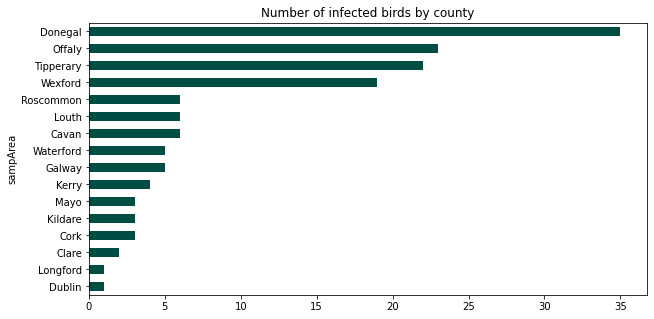

In [18]:
infected_birds.groupby('sampArea')['sampArea'].count()\
    .sort_values(ascending=True)\
    .plot(kind='barh', figsize=(10, 5), color='#004D44', title='Number of infected birds by county')

In [22]:
infected_birds.groupby('sampMonth')['sampMonth'].count()

sampMonth
1      17
2       2
7       3
10      3
11    119
Name: sampMonth, dtype: int64